In [12]:
import pandas
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats
import math

In [4]:
def calcularTau(n):
    tStudent = abs(stats.t.ppf(0.05/2,n-2))
    tau = tStudent*(n-1)/(math.sqrt(n)*math.sqrt(n-2+tStudent**2))
    return tau

In [39]:
datos = pandas.read_csv('datos/cambridge.csv')
datos = datos.drop(16)

In [41]:
datos = pandas.read_csv('datos/moscu.csv')

In [43]:
datos = pandas.read_csv('datos/sidney.csv')

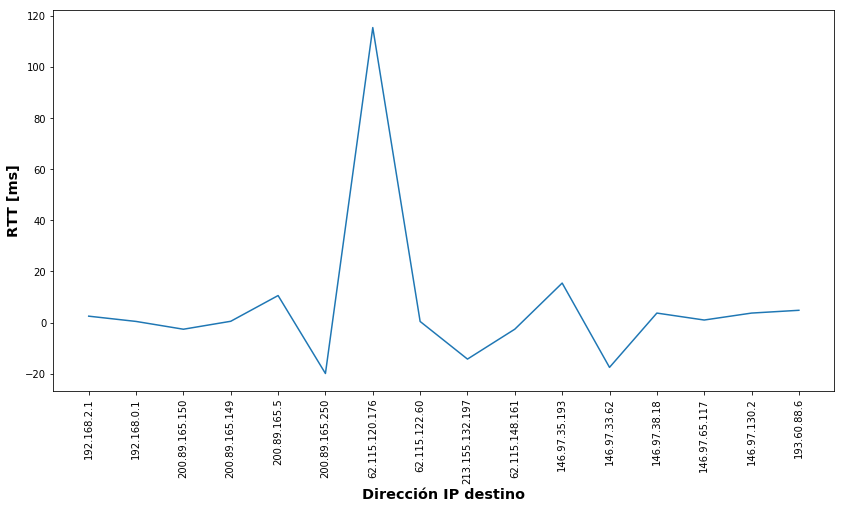

In [6]:
plt.figure(figsize=(14,7))
plt.plot(datos['IP2'], datos['RTT(ms)'])
plt.xticks(datos['IP2'], datos['IP2'], rotation='vertical')
plt.xlabel('Dirección IP destino', fontproperties=matplotlib.font_manager.FontProperties(size='x-large', weight='semibold'))
plt.ylabel('RTT [ms]', fontproperties=matplotlib.font_manager.FontProperties(size='x-large', weight='bold'))
plt.show()

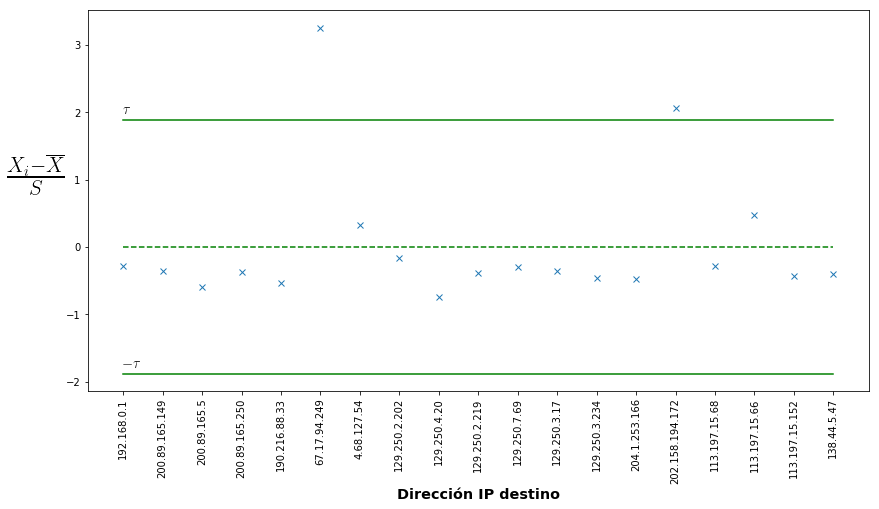

In [44]:
plt.figure(figsize=(14,7))
plt.plot(datos['IP2'], datos['(x_i-media(x))/s'], 'x')
plt.xticks(datos['IP2'], datos['IP2'], rotation='vertical')
plt.xlabel('Dirección IP destino', fontproperties=matplotlib.font_manager.FontProperties(size='x-large', weight='semibold'))
plt.ylabel('${X_{i}-\overline{X}}\over{S}$',rotation='horizontal', labelpad=30,usetex=True, fontproperties=matplotlib.font_manager.FontProperties(size='30', weight='bold'))

tau = calcularTau(len(datos))
plt.plot([0, len(datos['IP2'])-1], [tau, tau], 'g')
plt.plot([0, len(datos['IP2'])-1], [-tau, -tau], 'g')
plt.plot([0, len(datos['IP2'])-1], [0, 0], '--g')
plt.annotate('$\\tau$', (0, tau + 0.1), usetex=True, fontproperties=matplotlib.font_manager.FontProperties(size='x-large', weight='semibold'))
plt.annotate('$-\\tau$', (0, -tau + 0.1), usetex=True, fontproperties=matplotlib.font_manager.FontProperties(size='x-large', weight='semibold'))
plt.show()